### RBA's effect on NSW House valuations. 


Two simple regression models used. Both capture the negative relationship between the RBA overnight cash rate and the mean valuation of houses in NSW. No surprises in that as the RBA lowers rates house valuations continue to increase. 

First model uses standardised variables and second uses natural logs of variables.

Raw Data is provided in the repo. 

#### Nov/2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
pd.options.mode.chained_assignment = None 

In [2]:
#Read in data. create dataset containing House vakuations in NSW(qrtly) and the RBA cash rate(qrtly)

#ABS data source
house_prices= pd.read_excel('..houseprices.xlsx',sheet_name='Data1',header=0,
                            index_col=0, usecols=1,skiprows=9).rename(columns={'A83728603C':'house_values'})
house_prices.index.rename('date',inplace=True) 

#RBA data source
cash_rate=pd.read_excel('..rba.xlsx',sheet_name='Data',index_col=0, 
                            usecols=1,skiprows=10,header=0).rename(columns={'FIRMMCRTD':'cash_rate'})

#Change the cash rate dataset to quarterly from daily. Resulting data is slightly 'early-aligned' in terms of new dates but is forward-filled to 
#capture reality that markets can sometimes affect or usually predict RBA decisions. 
house_prices['cash_qrtly']= (cash_rate.asfreq('92D', method='ffill')[2:-2]).values 

house_prices.head()

,house_values,cash_qrtly
date,,
2011-09-01,1453495.0,4.75
2011-12-01,1442134.3,4.75
2012-03-01,1476077.7,4.25
2012-06-01,1492911.0,4.25
2012-09-01,1476006.3,3.50


In [3]:
#Check simple correlation between NSW house prics and RBA cash rates.
house_prices.corr()

,house_values,cash_qrtly
house_values,1.000000,-0.917666
cash_qrtly,-0.917666,1.000000


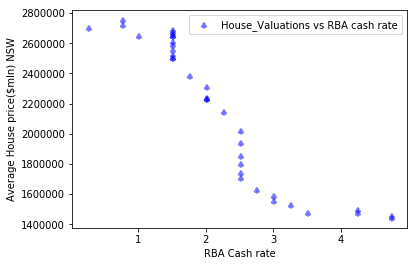

In [4]:
#Plot house valuations versus RBA overnight cash rate.
x = house_prices['cash_qrtly'] 
y =  house_prices['house_values'] 
plt.scatter(x, y, c="b", alpha=0.4, marker=r'$\clubsuit$',
            label="House_Valuations vs RBA cash rate")
plt.xlabel("RBA Cash rate")
plt.ylabel("Average House price($mln) NSW")
plt.legend(loc='upper right')
plt.show()

In [5]:
#Scaled data
scaler = StandardScaler()
house_prices_sc=pd.DataFrame(scaler.fit_transform(house_prices),
                             columns=house_prices.columns,index=house_prices.index) 

In [6]:
#Check top of sclaed dataframe 
house_prices_sc.head()

,house_values,cash_qrtly
date,,
2011-09-01,-1.500035,2.360248
2011-12-01,-1.524247,2.360248
2012-03-01,-1.451905,1.894665
2012-06-01,-1.416029,1.894665
2012-09-01,-1.452058,1.196290


In [7]:
#Standardised model not differenced. Autocorrelation present and HAC model used to adjust Standard error around coefficient.
y_sc= pd.DataFrame(house_prices_sc['house_values'])
x_sc=pd.DataFrame(house_prices_sc['cash_qrtly']) 
X_sc = sm.add_constant(x_sc)
model_1 = sm.OLS(y_sc,X_sc).fit(cov_type='HAC',cov_kwds={'maxlags':5})
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           house_values   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     57.72
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           7.94e-09
Time:                        17:04:54   Log-Likelihood:                -17.856
No. Observations:                  36   AIC:                             39.71
Df Residuals:                      34   BIC:                             42.88
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.829e-16      0.133  -4.37e-15      1.000      -0.262       0.262
cash_qrtly    -0.9177      0.121     -7.597      0.000      -1.154      -0.681
==============================================================================
Omnibus:                        4.051   Durbin-Watson:                   0.212
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                1.960
Skew:                          -0.258   Prob(JB):                        0.375
Kurtosis:                       1.980   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 5 lags and without small sample correction
"""

In [8]:
#log-log model not differenced.Autocorrelation present and HAC model used to adjust Standard error around coefficient.
y_log= pd.DataFrame(np.log(house_prices['house_values']))
x_log= pd.DataFrame(np.log(house_prices['cash_qrtly'])) 
X_log = sm.add_constant(x_log)
model_2 = sm.OLS(y_log,X_log).fit(cov_type='HAC',cov_kwds={'maxlags':5})
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           house_values   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     12.48
Date:                Thu, 05 Nov 2020   Prob (F-statistic):            0.00120
Time:                        17:04:54   Log-Likelihood:                 23.042
No. Observations:                  36   AIC:                            -42.08
Df Residuals:                      34   BIC:                            -38.92
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7824      0.082    180.732      0.000      14.622      14.943
cash_qrtly    -0.3383      0.096     -3.533      0.000      -0.526      -0.151
==============================================================================
Omnibus:                       11.278   Durbin-Watson:                   0.315
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.028
Skew:                          -1.060   Prob(JB):                      0.00403
Kurtosis:                       4.691   Cond. No.                         2.74
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 5 lags and without small sample correction
"""